pandas (http://pandas.pydata.org/) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

It's common to see pandas, numpy and matplotlib imported this way. We also have to specify that we would like generated images to be presented on this page. There are configuration options for Jupyter to do this automatically.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

First let's revisit the data we gathered earlier. We created a list of lists which pair up an IP address and how many times that IP address was seen in an nginx access log file.

In [3]:
histogram = !cat access.log | awk '{print $1}' | sort | uniq -c | sort -rn
histogram = [line.strip() for line in histogram]
histogram = [line.split() for line in histogram][:10]
histogram

[['206', '64.134.25.220'],
 ['138', '70.114.7.38'],
 ['115', '70.125.133.107'],
 ['109', '61.219.149.7'],
 ['93', '70.114.8.49'],
 ['80', '24.153.162.178'],
 ['50', '72.32.146.52'],
 ['47', '72.3.128.84'],
 ['46', '50.56.228.100'],
 ['46', '38.103.208.94']]

Now we want to take this data and have pandas be able to do something with it. We begin by creating a "DataFrame" from the 'histogram' variable. DataFrames (DF from here on) are essentially spreadsheets that pandas can do some work on.

A common idiom in pandas is to use the 'head' and 'tail' functions to get a quick peek at the DF without having to load the entire thing (especially useful if your DF is large).

In [4]:
df = pd.DataFrame(histogram, columns=['count', 'IP'])
df.head()

,count,IP
0,206,64.134.25.220
1,138,70.114.7.38
2,115,70.125.133.107
3,109,61.219.149.7
4,93,70.114.8.49


We can have pandas well us some information about the DF like what type of objects it's comprised of.

In [5]:
df.dtypes

count    object
IP       object
dtype: object

Uh-oh. Pandas will call data an 'oject' when it's a mix of types or its type is unknown. It sort of makes sense that pandas may not understand IP addresses but the first column should work right? Let's take a closer look at 'histogram' again

In [6]:
print histogram[0]
print type(histogram[0][0])
print type(histogram[0][1])

['206', '64.134.25.220']
<type 'str'>
<type 'str'>


We need to tell pandas that the first column should be integers. We can 'apply' a function to a column like this:

In [7]:
df['count'] = df['count'].apply(int)
df.dtypes

count     int64
IP       object
dtype: object

In [8]:
df.head()

,count,IP
0,206,64.134.25.220
1,138,70.114.7.38
2,115,70.125.133.107
3,109,61.219.149.7
4,93,70.114.8.49


Now we can make a simple plot:

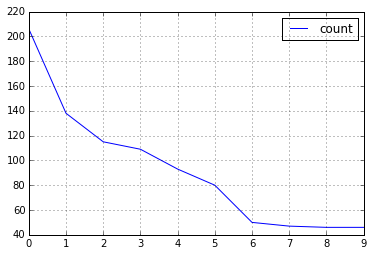

In [9]:
df.plot()

Yeah, not what we wanted at all. Let's start by sorting the columns:

In [10]:
df.sort(columns='count', ascending=True)

,count,IP
8,46,50.56.228.100
9,46,38.103.208.94
7,47,72.3.128.84
6,50,72.32.146.52
5,80,24.153.162.178
4,93,70.114.8.49
3,109,61.219.149.7
2,115,70.125.133.107
1,138,70.114.7.38
0,206,64.134.25.220


Now we can plot with the proper type of visualization for this data. We have to specify which data we expect to have plotted against the count data.

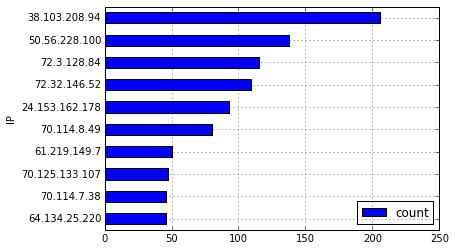

In [11]:
df.sort(columns='count', ascending=True).plot(kind='barh', x=df['IP'])

From here we can start styling the graph to reduce visual noise.

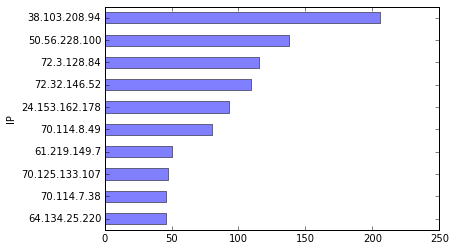

In [12]:
df.sort(columns='count', ascending=True).plot(kind='barh', x=df['IP'], grid=False, legend=False, alpha=0.5)

If we put this plot object into a variable we have more options available to us to configure it's appearance:

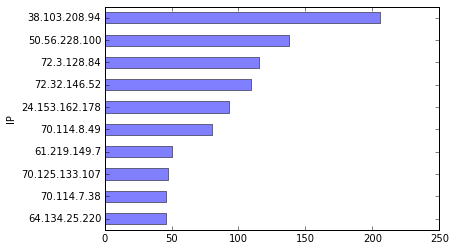

In [19]:
ax = df.sort(columns='count', ascending=True).plot(kind='barh', x=df['IP'], grid=False, legend=False, alpha=0.5)

In [20]:
ymin, ymax = ax.get_ylim()
ax.vlines(x=df['count'].mean(), ymin=ymin, ymax=ymax, color='r')